In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Generic properties from matplotlib
rcParams['font.family'] = 'serif'
rcParams['text.usetex'] = True

In [2]:
greenhouse_data = pd.read_csv('AIR_GHG_28022023214517313.csv')

In [7]:
greenhouse_data

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425624.307,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,425686.445,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,429473.085,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430381.731,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430848.498,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75701,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2005,2005,NaN,NaN,0,Units,NaN,NaN,0.773,NaN,NaN
75702,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2010,2010,NaN,NaN,0,Units,NaN,NaN,0.612,NaN,NaN
75703,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2012,2012,NaN,NaN,0,Units,NaN,NaN,0.565,NaN,NaN
75704,PER,Peru,GHG,Greenhouse gases,GHG_GDP_LULU,Total GHG incl. LULUCF per unit of GDP,2014,2014,NaN,NaN,0,Units,NaN,NaN,0.579,NaN,NaN


In [13]:
year_data = greenhouse_data['Year']

In [15]:
pollutant_value = greenhouse_data['Value']

In [16]:
country_name = greenhouse_data['Country']

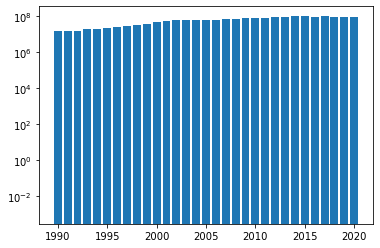

In [20]:
plt.bar(year,pollutant_value)
plt.yscale('log')

<BarContainer object of 75706 artists>

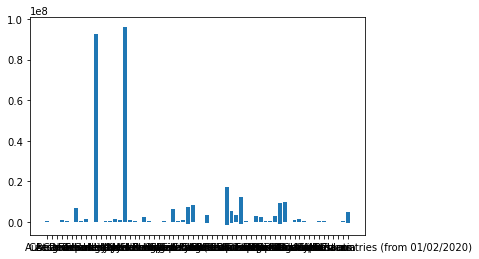

In [22]:
#country_name

plt.bar(country_name,pollutant_value)
#plt.yscale('log')

In [64]:
avg_value_data = greenhouse_data.groupby('Country').agg({'Value': ['mean', 'min', 'max']})
avg_value_data.columns = ['p_mean', 'p_min', 'p_max']
avg_value_data = avg_value_data.reset_index()

In [88]:
avg_value_data_sorted = avg_value_data.sort_values(by=['p_mean'])

In [89]:
avg_value_data_sorted

,Country,p_mean,p_min,p_max
39,Monaco,5.347641e+01,-0.119,4.916560e+02
37,Malta,7.585479e+02,-8.380,4.409937e+04
13,Cyprus,9.746765e+02,-360.502,1.002569e+04
33,Latvia,1.124264e+03,-15884.556,2.586825e+04
23,Iceland,1.335085e+03,0.001,5.888222e+04
...,...,...,...,...
22,Hungary,7.839396e+05,-6823.053,9.243000e+07
45,OECD America,9.204419e+05,-1012966.000,9.103397e+06
36,Luxembourg,1.271003e+06,-629.047,9.591975e+07
9,China (People's Republic of),1.330192e+06,-1114790.000,1.230020e+07


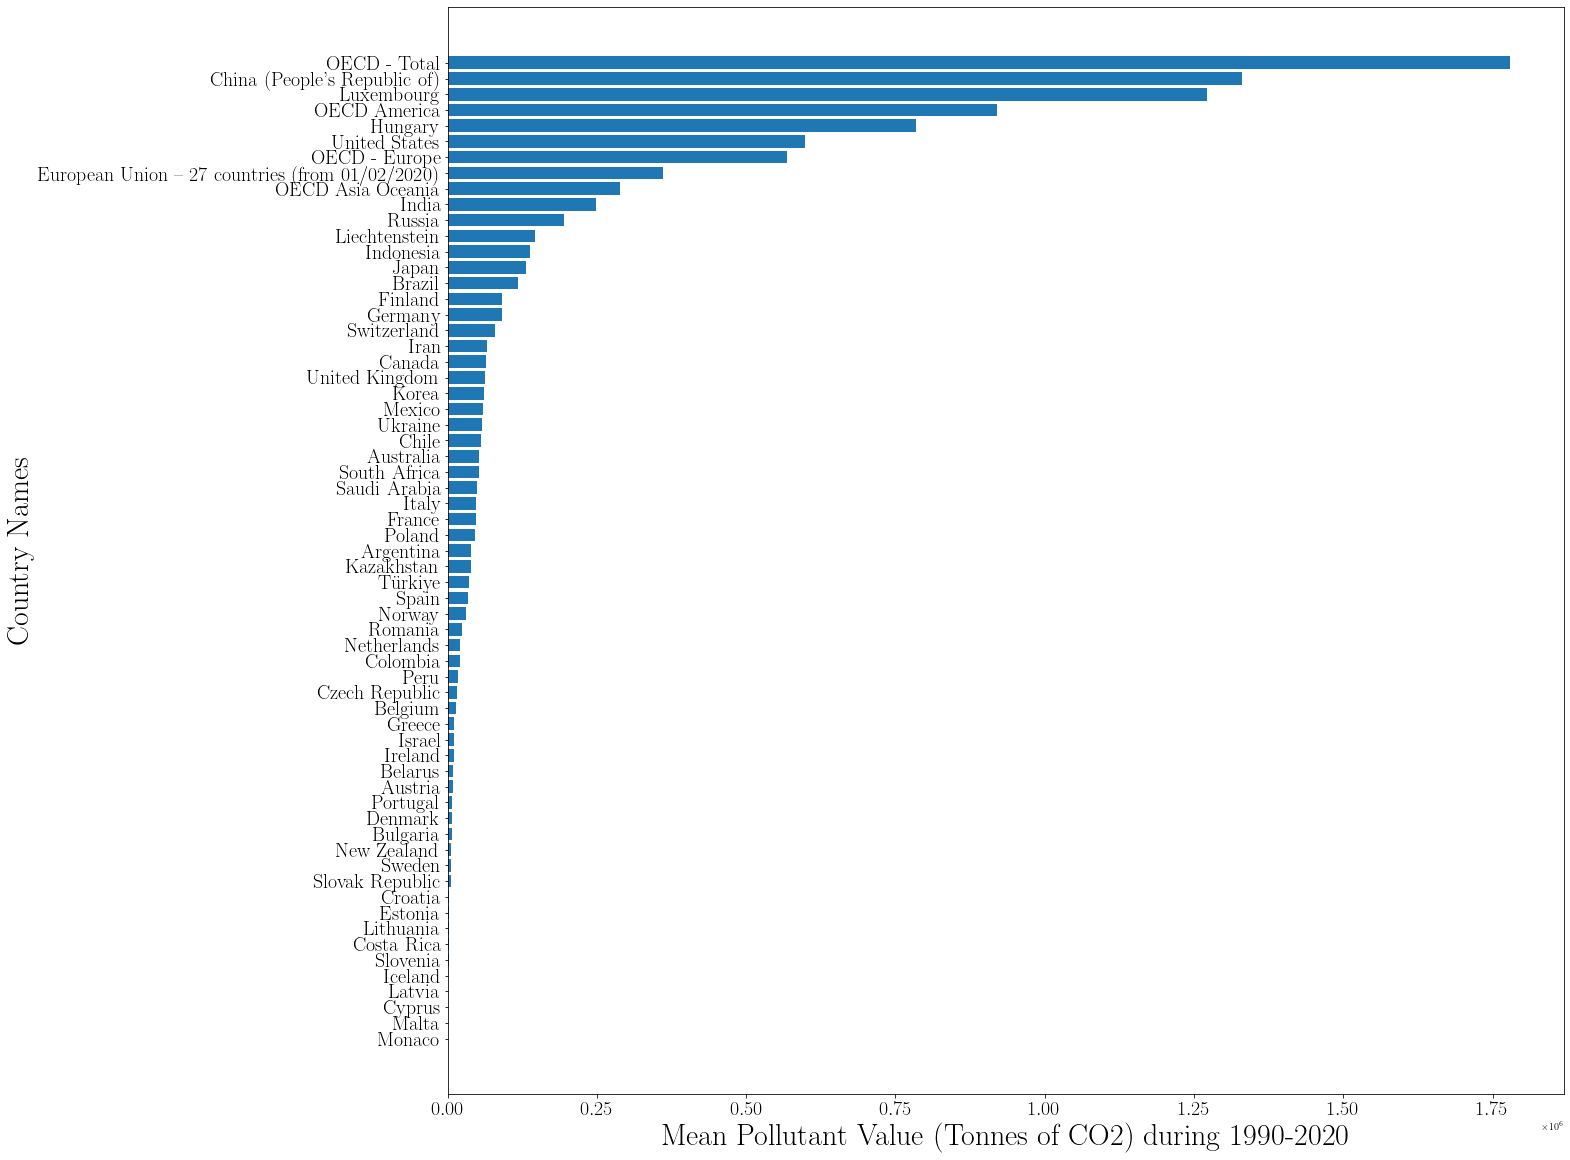

In [91]:
plt.figure(figsize=(20,20))
plt.barh(avg_value_data_sorted['Country'],avg_value_data_sorted['p_mean'])
plt.xlabel("Mean Pollutant Value (Tonnes of CO2) during 1990-2020",fontsize=30)
plt.ylabel("Country Names",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xscale('log')
plt.show()